In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
dfa=pd.read_csv(r"C:\Users\School\Desktop\Datasets\Analytics Vidhya\airpassengers.csv")

In [2]:
dfa.head(1)

,Month,#Passengers
0,1949-01,112


In [106]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [4]:
dfa.shape

(144, 2)

In [5]:
dfa.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
dfa.rename(columns={'#Passengers':'Passengers'}, inplace=True)

In [7]:
dfa.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [8]:
dfa.rename(str.lower, axis=1, inplace=True)

In [9]:
dfa.head()

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
from datetime import datetime

In [11]:
ts=dfa['passengers']

In [12]:
dfa.sort_values(['month'], ascending=True)
dfa.head(1)

,month,passengers
0,1949-01,112


In [13]:
dfa['month'] = pd.to_datetime(dfa['month'], errors='coerce')

In [14]:
dfa.head(1)

,month,passengers
0,1949-01-01,112


In [110]:
indexedDataset = dfa.set_index(['month'])
indexedDataset.head(5)

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


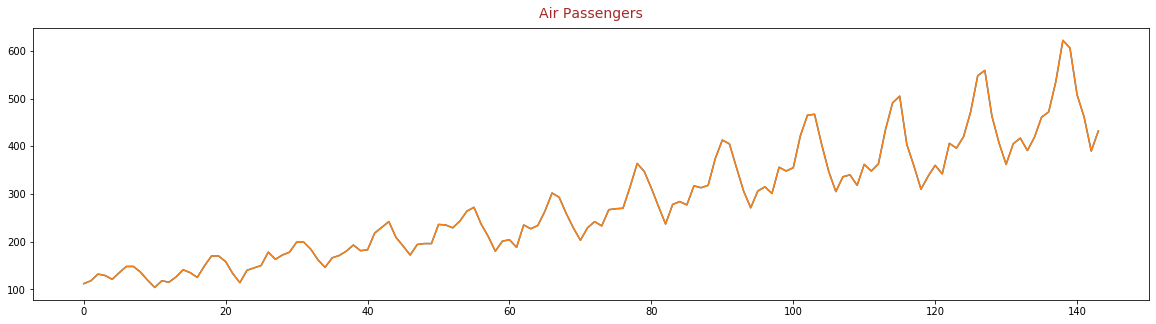

In [17]:
plt.figure(figsize=(20,5))
plt.plot(dfa['passengers'])
plt.title("Air Passengers", color ='brown', size=14, pad=10)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(ts)

In [53]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries): 
    rolmean  = pd.Series(timeseries).rolling(window=12).mean()
    rolstd   = pd.Series(timeseries).rolling(window=12).std()
    plt.figure(figsize=(20,5))
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rolling Mean')
    std=plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std Deviation', color='m', size=14, pad=10)
    plt.show()
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

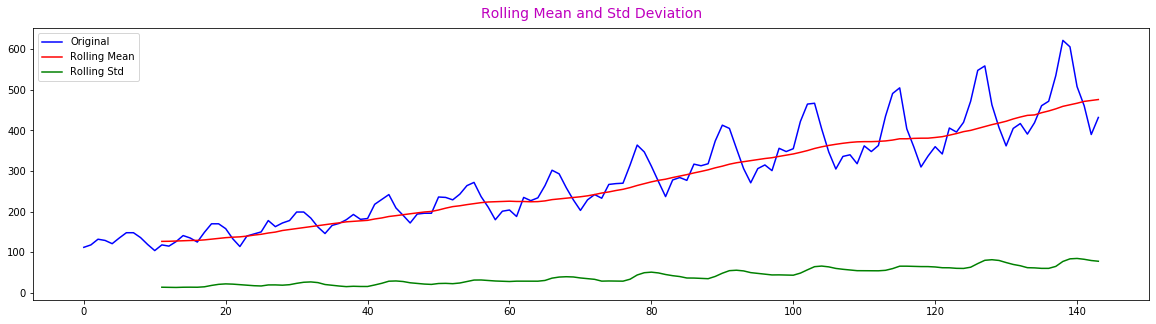

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [54]:
test_stationarity(ts)

In [55]:
ts_log = np.log(ts)

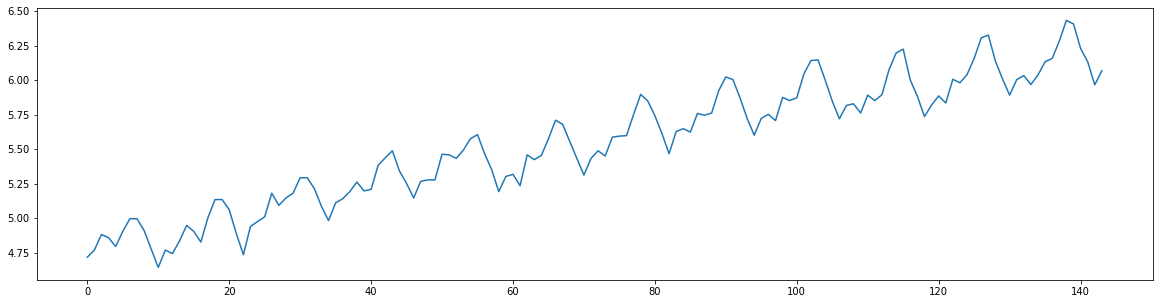

In [56]:
plt.figure(figsize=(20,5))
plt.plot(ts_log)

No handles with labels found to put in legend.


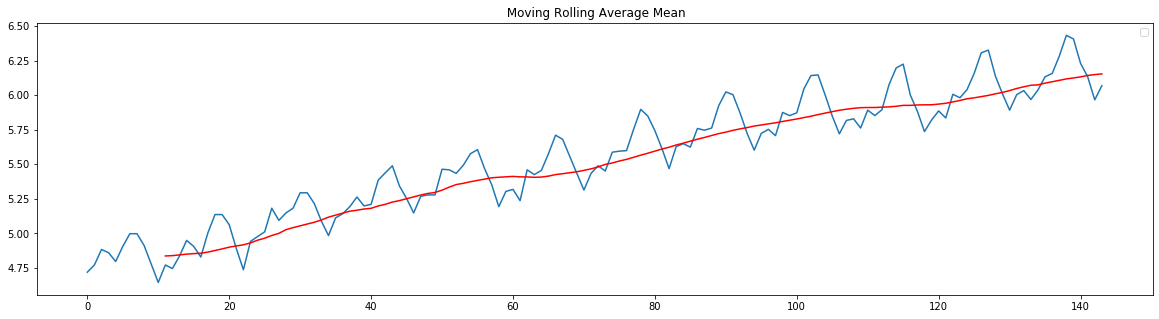

In [57]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.figure(figsize=(20,5))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.title(" Moving Rolling Average Mean") 
plt.legend(loc='best')

In [58]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [59]:
ts_log_moving_avg_diff.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
Name: passengers, dtype: float64

In [60]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [61]:
ts_log_moving_avg_diff.head(12)

11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
15    0.052142
16   -0.027529
17    0.139881
18    0.260184
19    0.248635
20    0.162937
21   -0.018578
22   -0.180379
Name: passengers, dtype: float64

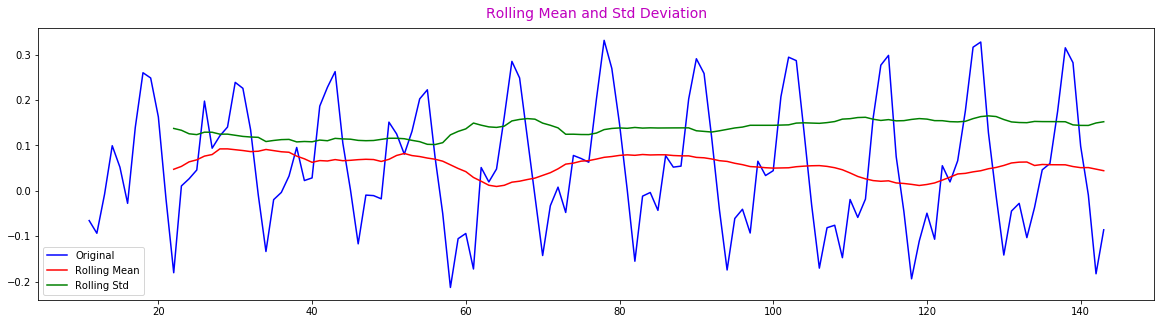

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [62]:
test_stationarity(ts_log_moving_avg_diff)

In [63]:
exponential_weighted_avg = ts_log.ewm(halflife=12, com=None, alpha=None).mean()

Text(0.5, 1.0, 'Exponential weighted Avg Mean & Transformation via Log')

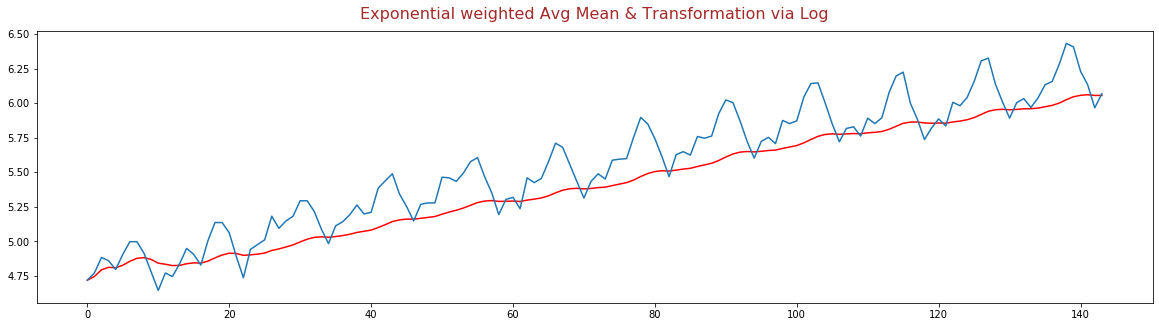

In [64]:
plt.figure(figsize=(20,5))
plt.plot(exponential_weighted_avg, color='red')
plt.plot(ts_log)
plt.title("Exponential weighted Avg Mean & Transformation via Log", size=16, color='brown', pad=12)

In [65]:
ts_log_ewma_diff = ts_log-exponential_weighted_avg

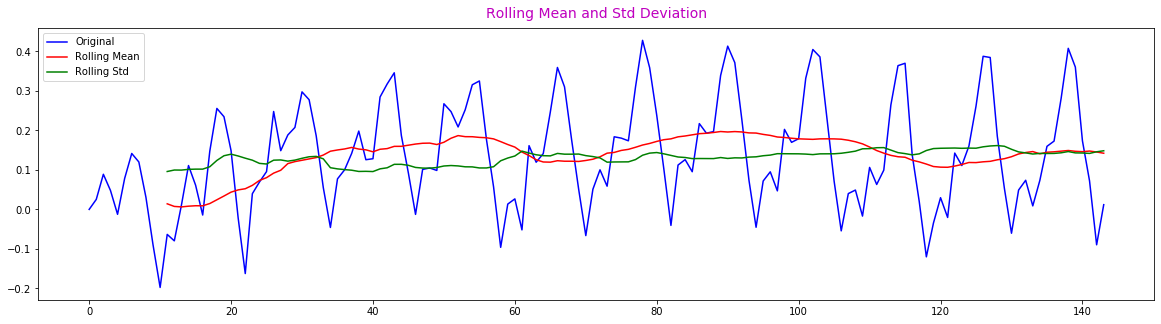

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [66]:
test_stationarity(ts_log_ewma_diff)

In [67]:
ts_log_diff = ts_log - ts_log.shift()

Text(0.5, 1.0, 'ts_log_df')

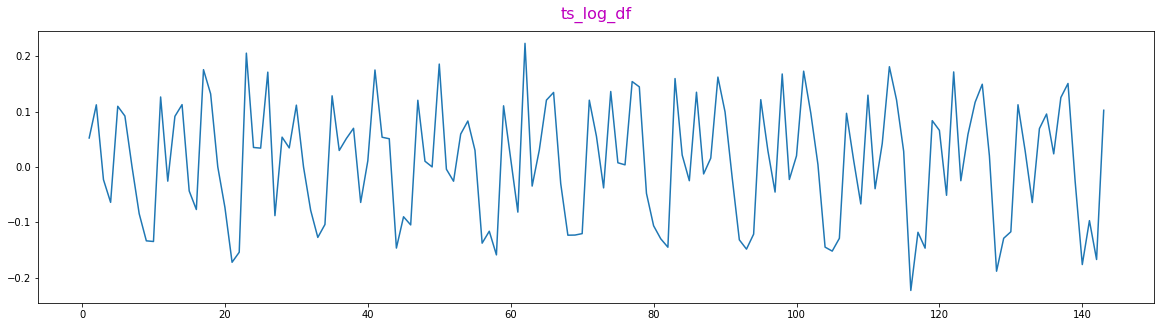

In [68]:
plt.figure(figsize=(20,5))
plt.plot(ts_log_diff)
plt.title("ts_log_df", color='m', size=16, pad=12)

In [69]:
ts_log_diff.dropna(inplace=True)

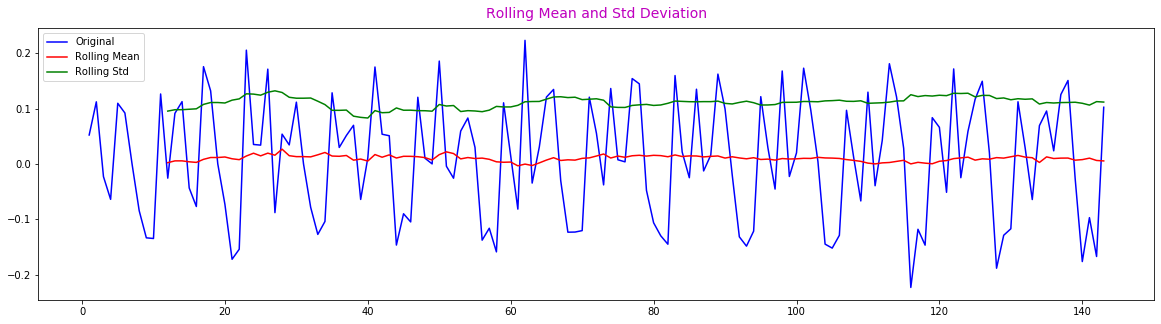

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [70]:
test_stationarity(ts_log_diff)

<Figure size 1440x360 with 0 Axes>

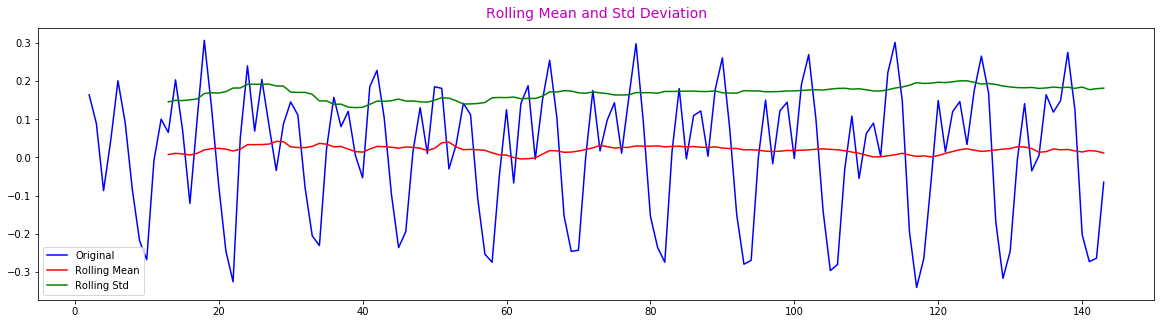

Results of Dickey-Fuller Test:
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [73]:
ts_log_diff_2 = ts_log - ts_log.shift(2)
ts_log_diff_2.dropna(inplace=True)
plt.figure(figsize=(20,5))
test_stationarity(ts_log_diff_2)

In [74]:
ts_log_diff_3 = ts_log - ts_log.shift(3)

ts_log_diff_3.dropna(inplace=True)


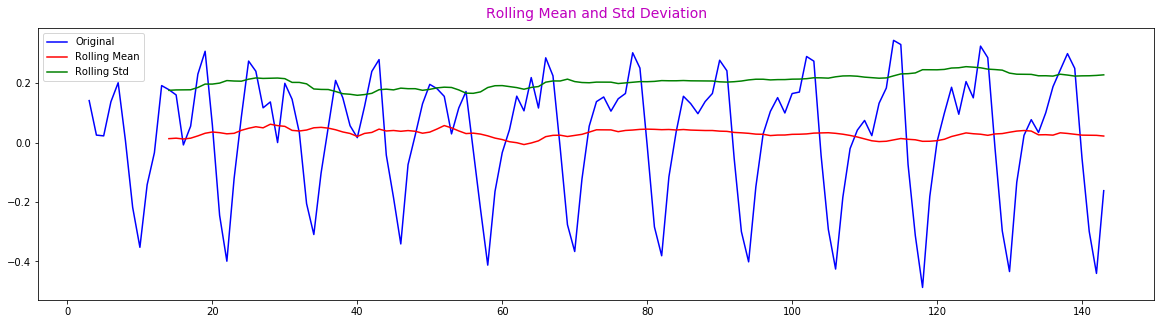

Results of Dickey-Fuller Test:
Test Statistic                  -2.728487
p-value                          0.069237
#Lags Used                      12.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [75]:
test_stationarity(ts_log_diff_3)

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend 
seasonal = decomposition.seasonal
residual = decomposition.resid

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


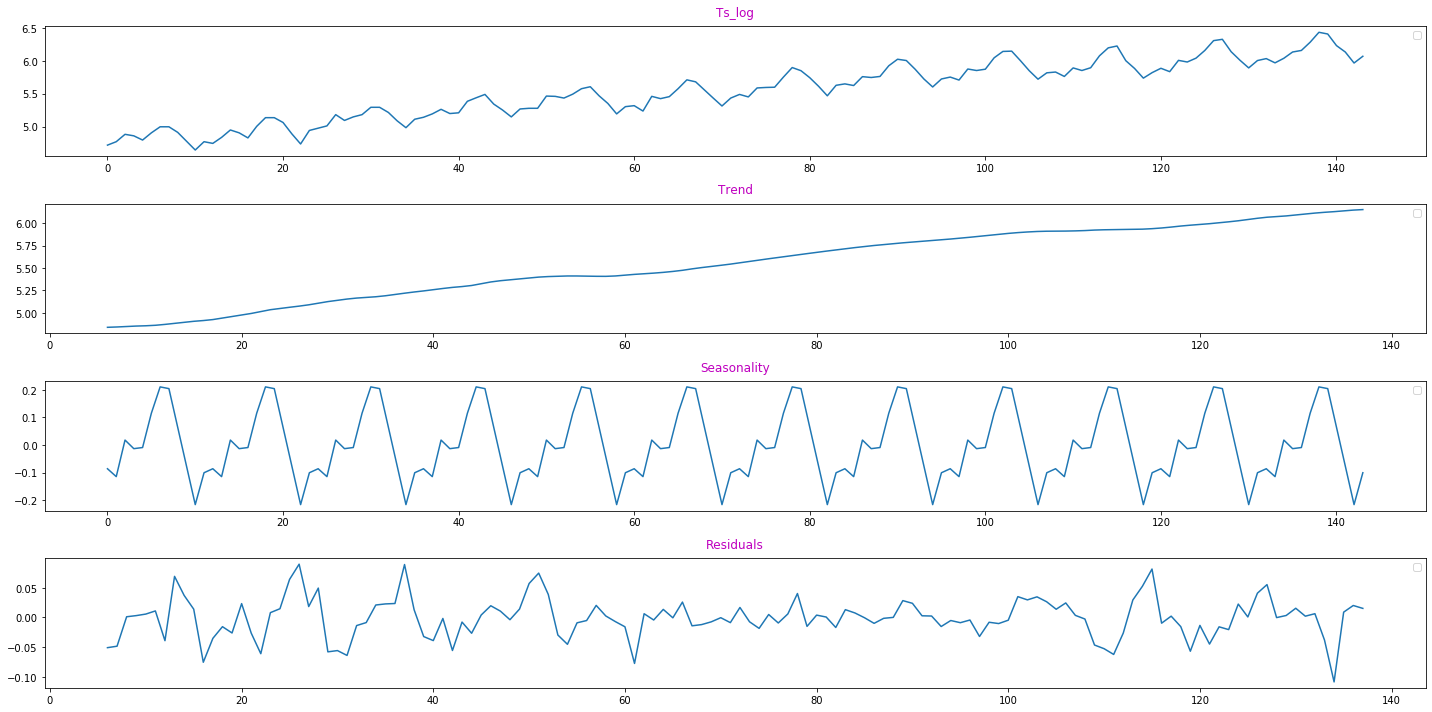

In [80]:
plt.figure(figsize=(20,10))

plt.subplot(411)
plt.plot(ts_log)
plt.title("Ts_log", size=12, pad=10, color='m')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend)
plt.title("Trend", size=12, pad=10, color='m')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal)
plt.title("Seasonality", size=12, pad=10, color='m')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual)
plt.title("Residuals", size=12, pad=10, color='m')
plt.legend(loc='best')

plt.tight_layout()

In [81]:
ts_log_decompose = residual 
ts_log_decompose.head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6   -0.050884
7   -0.048415
8    0.001223
9    0.003156
Name: passengers, dtype: float64

In [82]:
ts_log_decompose.dropna(inplace=True)

In [83]:
ts_log_decompose.head(5)

6    -0.050884
7    -0.048415
8     0.001223
9     0.003156
10    0.005749
Name: passengers, dtype: float64

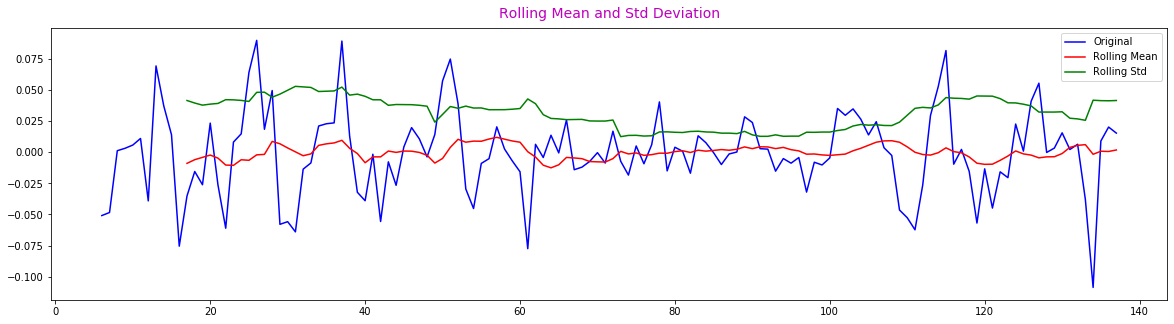

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [84]:
test_stationarity(ts_log_decompose)

In [85]:
# ACF and PACF Plots 

from statsmodels.tsa.stattools import acf, pacf

In [86]:
lag_acf = acf(ts_log_diff, nlags=20)

C:\Users\School\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [87]:
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

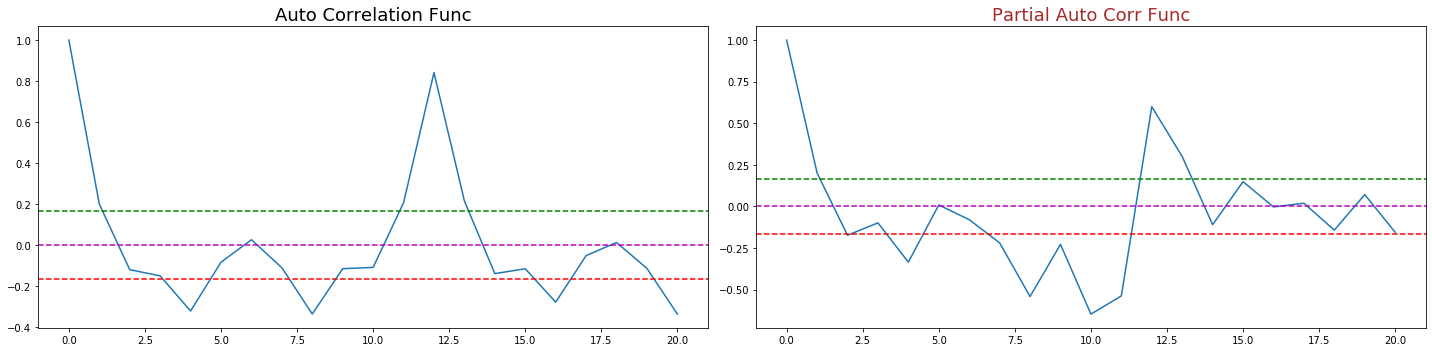

In [90]:
# Plot ACF 

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='m')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='r')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='g')
plt.title("Auto Correlation Func", fontsize=18)

plt.subplot(122)
plt.plot(lag_pacf)

plt.axhline(y=0, linestyle='--', color='m')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='r')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='g')
plt.title("Partial Auto Corr Func", fontsize=18, color='brown')

plt.tight_layout()

Text(0.5, 1.0, 'RSS:1.5023')

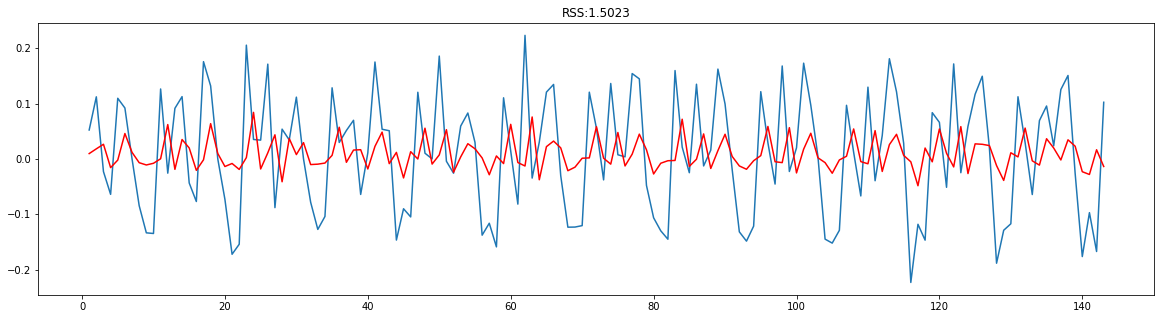

In [91]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,5))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS:nan')

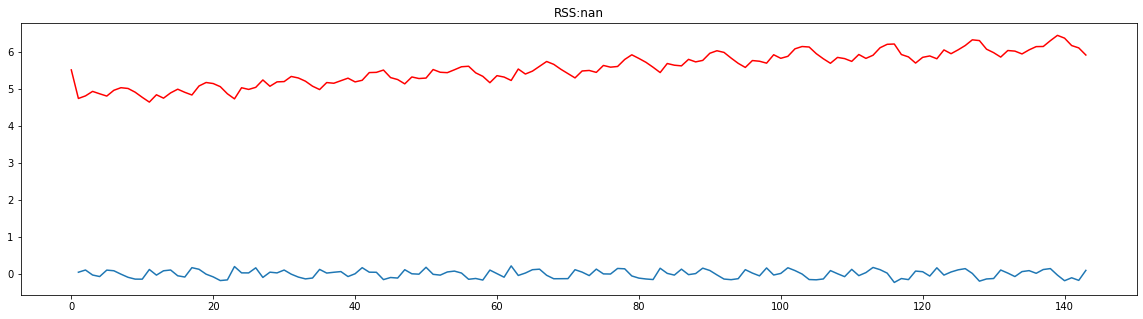

In [92]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order = (1,0,1))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,5))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS:1.4721')

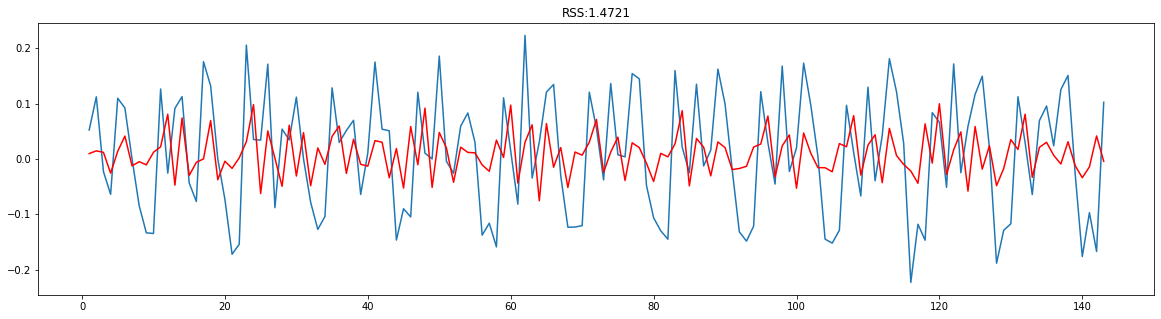

In [93]:
model =ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(20,5))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 1.0292')

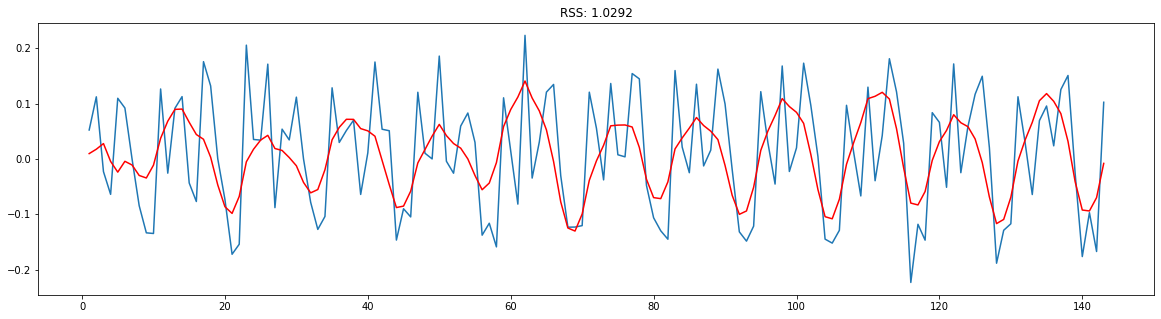

In [94]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(20,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [95]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy =True)
predictions_ARIMA_diff.head()

1    0.009580
2    0.017491
3    0.027670
4   -0.004521
5   -0.023890
dtype: float64

In [96]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

1    0.009580
2    0.027071
3    0.054742
4    0.050221
5    0.026331
dtype: float64

In [97]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\School\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    4.718499
1    4.728079
2    4.745570
3    4.773241
4    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

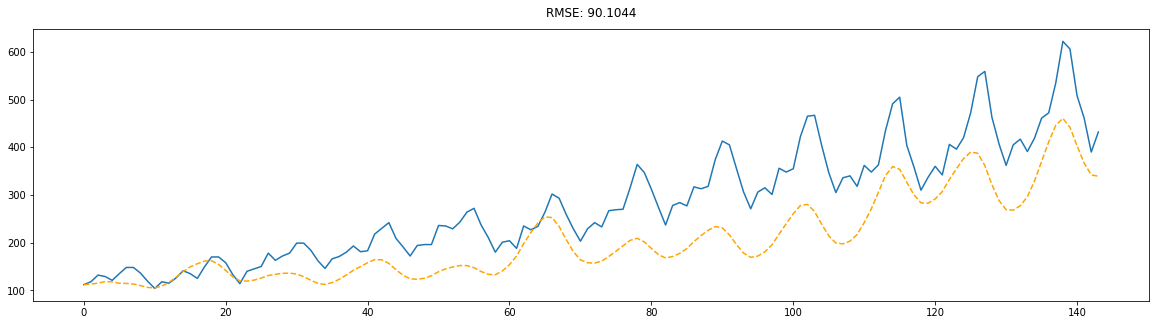

In [107]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,5))
plt.plot(ts)
plt.plot(predictions_ARIMA, color='orange',linestyle='--')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)), pad=12)

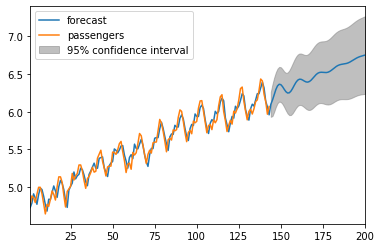

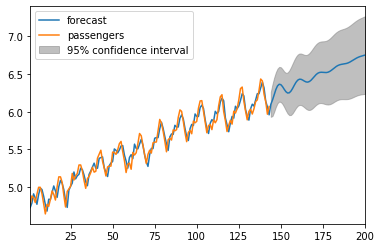

In [105]:
results_ARIMA.plot_predict(1,200)